In [1]:
using LinearAlgebra 
using Kronecker
using Plots
using Random, Distributions

In [2]:
X = [0 1 ; 1 0 ];
Y = [0 -1im ; im 0 ];
Z = [1 0 ; 0 -1 ];


H=1/sqrt(2)*[1 1 ; 1 -1];

S=[1 0; 0 im];
T=[1 0; 0 exp(im*pi/4)];



function RX(r)
    exp(-im*r/2*X)
end

function RY(r)
    exp(-im*r/2*Y)
end

function RZ(r)
    exp(-im*r/2*Z)
end


CNOT=[1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0];
REVCNOT=kronecker(H, H)*CNOT*kronecker(H, H);


In [6]:
#The Random Field (Note the required Nesting):


RH1=fill(fill(0.1+im, 2,2), 12);
RU=fill(fill(0.1+im, 2,2), 12);

#Generating a GUE:

l = Normal(0, 0.50);   #off diagonal elements
d = Normal(0, 1.00);   #diagonal elements


for j in 1:length(RU)
    
    
    A=rand(l,2,2)+im*rand(l,2,2);
    for i in 1:dim(A)
        A[i,i]=rand(d)+im*rand(d);
    end
    
#Symmetrisation and Exponentiation:
    
    
    RH1[j]=(A+A')/2;
    
end

In [ ]:
 
FU=fill(fill(0.1+im, 4,4), 6);
ordpar=fill(0.1,5);

#Looping:

for al in 1:length(ordpar)
    
    alpha=0.2*(al-1);
       
    for j in 1:length(RU)
        RU[j]=exp(im*alpha*RH1[j]);
    end
       
    ZRow=copy(kronecker(RU[1],RU[2],RU[3],RU[4],RU[5],RU[6],RU[7],RU[8],RU[9],RU[10],RU[11],RU[12]));
    UOdd=copy(kronecker(CNOT,CNOT,CNOT,CNOT,CNOT,CNOT))
    UEven=copy(kronecker(I(2),CNOT,CNOT,CNOT,CNOT,CNOT,I(2)));
    
    A=UEven*UOdd*ZRow
    
   
    
    EigA=eigvals(A);
    N=fill(0.1,length(EigA))


        for i in 1:length(EigA)
            N[i]=real(log(EigA[i])/(-im));
        end

    N= sort(N,rev=true);
    EigA1=copy(N);
    ls = deleteat!(EigA1,1);
    la = deleteat!(N,length(N));
    m=copy(la-ls)/mean(la-ls)
    
    
    
    
    n=fill(0.1,length(EigA)-2);

        for i in 1:length(n)
            #n[i]=m[i+1]/m[i];
            n[i]= minimum([m[i], m[i+1]])/maximum([m[i], m[i+1]]);
        end

    ordpar[al]=mean(n);
end
    
    
    
    

In [ ]:
xax=1:length(ordpar)
plot(xax,ordpar)

In [93]:
ZRow=copy(kronecker(RU[1],RU[2],RU[3],RU[4],RU[5],RU[6],RU[7],RU[8],RU[9],RU[10],RU[11],RU[12]));
UOdd=copy(kronecker(CNOT,CNOT,CNOT,CNOT,CNOT,CNOT))
UEven=copy(kronecker(I(2),CNOT,CNOT,CNOT,CNOT,CNOT,I(2)));

In [ ]:
A=UEven*UOdd*ZRow

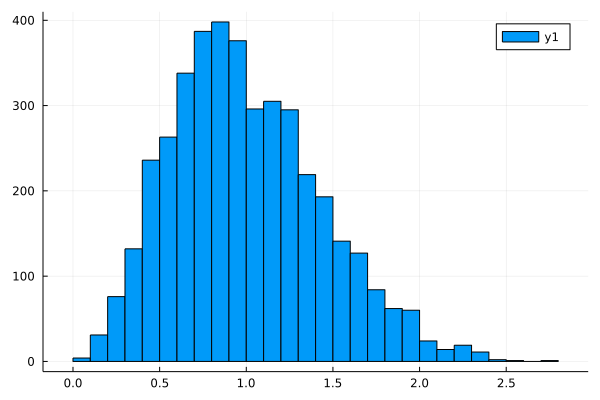

In [95]:

EigA=eigvals(A);

N=fill(0.1,length(EigA))


for i in 1:length(EigA)
    N[i]=real(log(EigA[i])/(-im));
end

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)/mean(la-ls)

histogram(m)

In [96]:
A=UEven*UOdd

4096×4096 Matrix{Int64}:
 1  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  1  0 

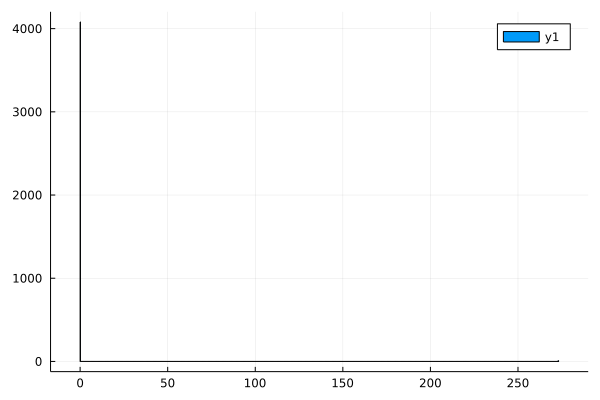

In [97]:

EigA=eigvals(A);

N=fill(0.1,length(EigA))


for i in 1:length(EigA)
    N[i]=real(log(EigA[i])/(-im));
end

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)/mean(la-ls)

histogram(m)

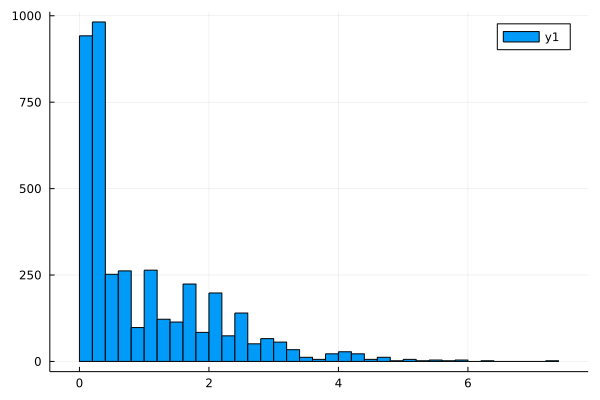

In [99]:

EigA=eigvals(ZRow);

N=fill(0.1,length(EigA))


for i in 1:length(EigA)
    N[i]=real(log(EigA[i])/(-im));
end

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)/mean(la-ls)

histogram(m)

In [86]:
FU=fill(fill(0.1+im, 4,4), 6);

for j in 1:length(FU)
    FU[j]=CNOT*kronecker(RU[j],RU[j+6])*CNOT;
end



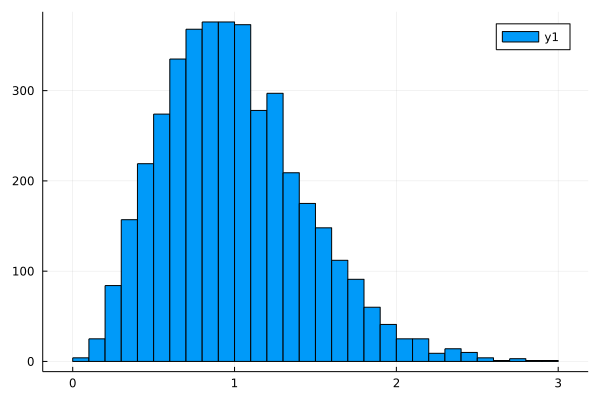

In [92]:

EigA=eigvals(A);

N=fill(0.1,length(EigA))


for i in 1:length(EigA)
    N[i]=real(log(EigA[i])/(-im));
end

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)/mean(la-ls)

histogram(m)

In [87]:
UOdd=copy(kronecker(FU[1],FU[2],FU[3],FU[4],FU[5],FU[6]));
UEven=copy(kronecker(I(2),FU[2],FU[3],FU[4],FU[5],FU[6],I(2)));


4096×4096 Matrix{ComplexF64}:
     0.165787-0.352587im     …    -3.1761e-7-8.71121e-7im
    0.0248036-0.100967im          1.81101e-6+2.96541e-6im
    0.0108644+0.0755442im             3.8e-6+2.82227e-6im
   -0.0159513+0.285565im         -8.45472e-7-9.3841e-7im
   -0.0462104-0.0388719im         5.95846e-6-5.36441e-7im
     -0.14102-0.176978im     …   -1.58699e-6-1.73427e-7im
    0.0878768+0.295477im         -1.03259e-6-5.54188e-7im
    0.0385479+0.0726698im          4.2033e-6+1.27236e-6im
  -0.00586788-0.0607699im        -4.58095e-6-3.74544e-6im
  -0.00473506-0.0155885im          1.9599e-5+1.03723e-5im
   0.00750716+0.00930966im   …    3.00471e-5+3.10667e-6im
    0.0206951+0.0397529im        -7.69678e-6-2.39493e-6im
  0.000755156-0.0150966im         1.61008e-5+1.76629e-5im
             ⋮               ⋱              ⋮
 -0.000222358-0.000162162im       0.00129612-0.000207888im
 -0.000696971-0.000760174im  …  -0.000350013-1.38671e-5im
   0.00049272+0.0013157im        -0.00023444-0.0001056